**Exploratory Data Analysis: Plots using the *seaborn* library**
___

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

The following is not necessary if your installed version of `seaborn` is the latest `0.13`. Otherwise, this will silence some unnecessary warnings.

In [2]:
import warnings
warnings.filterwarnings("ignore", "use_inf_as_na")

# Import data and compute returns

In [5]:
losses = pd.read_excel('losses.xlsx').set_index('Date').rename(columns={0: 'loss'})
losses.head()

,loss
Date,
2019-01-03,7.011460e+05
2019-01-04,-1.205288e+06
2019-01-07,-3.675803e+05
2019-01-08,-2.793440e+05
2019-01-09,-1.931419e+05


In [6]:
losses = pd.read_excel('losses.xlsx').set_index('Date').rename(columns={0: 'loss'}) / 1e6
losses.head()

,loss
Date,
2019-01-03,0.701146
2019-01-04,-1.205288
2019-01-07,-0.367580
2019-01-08,-0.279344
2019-01-09,-0.193142


# Plot the losses

Plot on `ax` the losses.  
Use matplotlib `stem()` function: <https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.stem.html>.  
Try the argument `markerfmt=''` to suppress the markers.

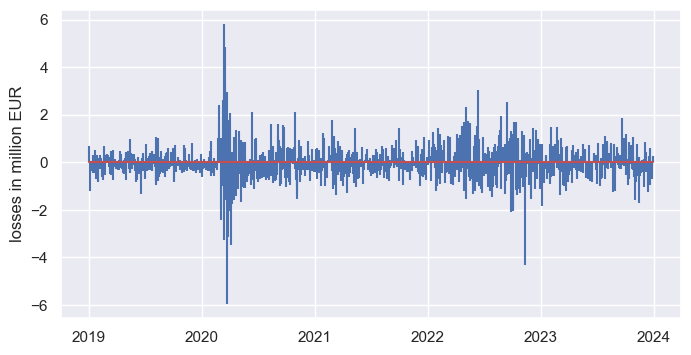

In [8]:
fig, ax = plt.subplots(figsize=(8,4))
ax.stem(losses.index, losses, markerfmt='')
ax.set_ylabel("losses in million EUR");

Same, but plot the absolute values of the returns.

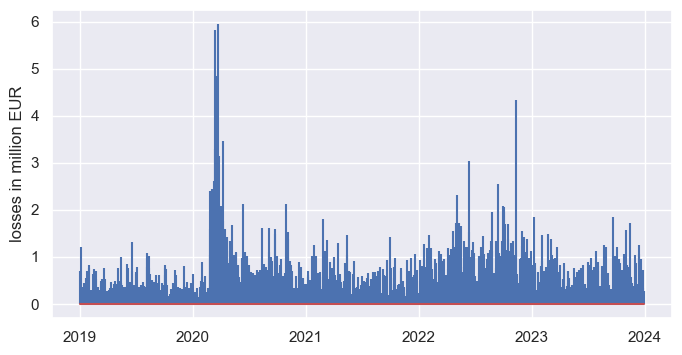

In [9]:
fig, ax = plt.subplots(figsize=(8,4))
ax.stem(losses.index, np.abs(losses), markerfmt='')
ax.set_ylabel("losses in million EUR");

# Empirical Cumulative Distribution Function

Using seaborn's `ecdfplot()` function, plot the empirical cumulative distribution function of the losses.  
Use the *Axes* object `my_ax` created by the `subplots()` function.  
<https://seaborn.pydata.org/generated/seaborn.ecdfplot.html>

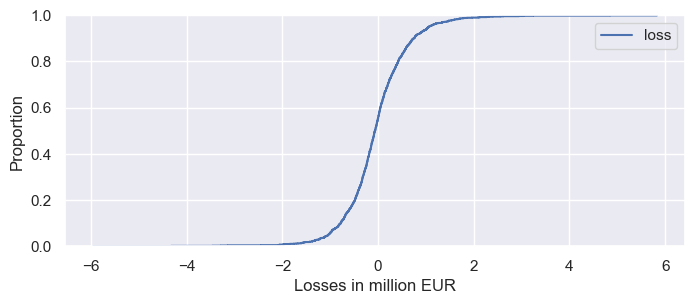

In [11]:
fig, my_ax = plt.subplots(figsize=(8,3))
sns.ecdfplot(losses, ax=my_ax)
my_ax.set_xlabel("Losses in million EUR");

# Histograms

Plot on `ax` the histogram of the losses.  
Use `matplotlib.axes.Axes.hist` and try different values for the number of bins with the parameter `bins=`.  
https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html

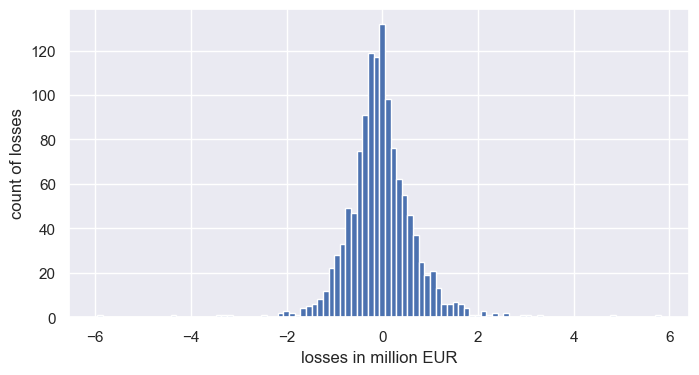

In [15]:
fig, ax = plt.subplots(figsize=(8,4))
ax.hist(losses, bins=100)
ax.set_xlabel("losses in million EUR")
ax.set_ylabel("count of losses");

Same but using `seaborn.histplot` <https://seaborn.pydata.org/generated/seaborn.histplot.html>.

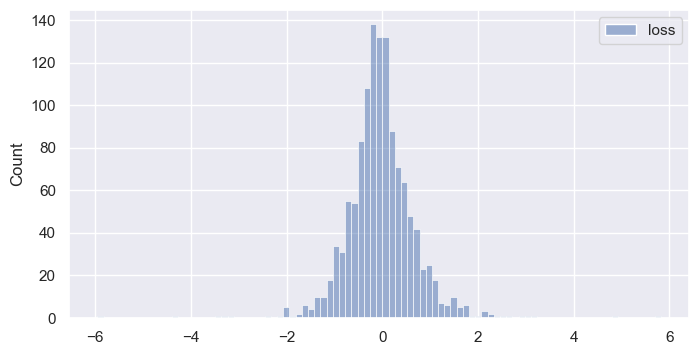

In [16]:
fig, ax = plt.subplots(figsize=(8,4))
sns.histplot(losses);

# Kernel Density Estimate

Plot on `ax` the KDE of the losses. Use `seaborn.kdeplot` <https://seaborn.pydata.org/generated/seaborn.kdeplot.html>.

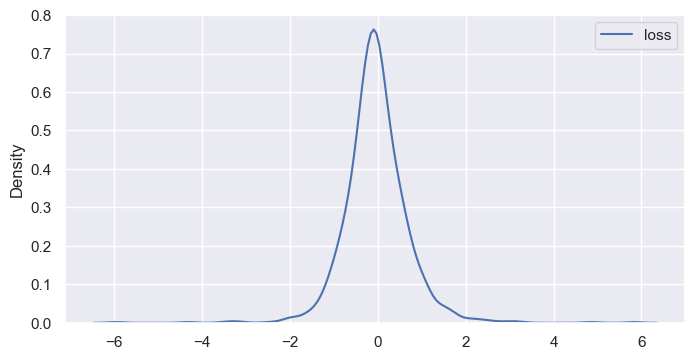

In [17]:
fig, ax = plt.subplots(figsize=(8,4))
sns.kdeplot(losses);

Plot an histogram with a KDE using `seaborn.histplot`. Use the option `kde=True`.

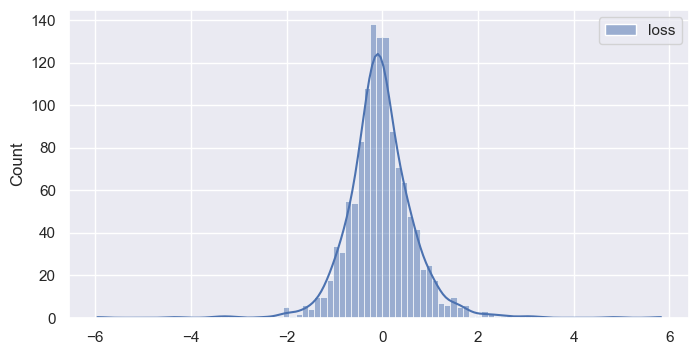

In [19]:
fig, ax = plt.subplots(figsize=(8,4))
sns.histplot(losses, kde=True);

# Varying colors using a semantic variable

To illustrate the possibilites of seaborn, we transform the DataFrame into a **Long-form** data table.  
<https://seaborn.pydata.org/tutorial/data_structure.html>

In [20]:
returns = pd.read_excel('hist_data.xlsx').set_index('Date').pct_change().dropna()
returns = returns.stack().reset_index().rename(columns={'level_1': 'name', 0: 'return'}).set_index('Date')
returns.tail()

,name,return
Date,,
2023-12-28,Commo,-0.003843
2023-12-28,TBond,-0.005958
2023-12-29,SP500,-0.002535
2023-12-29,Commo,-0.005545
2023-12-29,TBond,-0.001499


Using `kdeplot()`, we add a `hue='name'` parameter that is used to determine the colors.

In [43]:
returns

,name,return
Date,,
2019-01-03,SP500,-0.025189
2019-01-03,Commo,0.008431
2019-01-03,TBond,0.012990
2019-01-04,SP500,0.034113
2019-01-04,Commo,-0.007045
...,...,...
2023-12-28,Commo,-0.003843
2023-12-28,TBond,-0.005958
2023-12-29,SP500,-0.002535


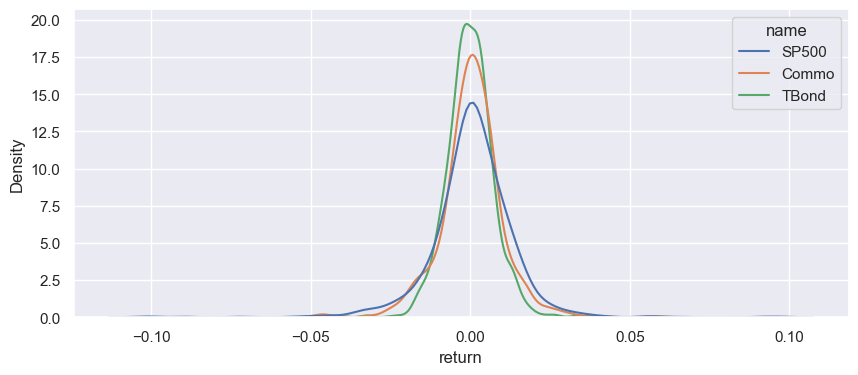

In [44]:
fig, ax = plt.subplots(figsize=(10,4))
sns.kdeplot(data=returns, x='return', hue='name');

# Box Plots

Using seaborn's `boxplot()`, plot a boxplot of the losses.  
To show the arithmetic average, add the arguments `showmeans=True`.  
<https://seaborn.pydata.org/generated/seaborn.boxplot.html>

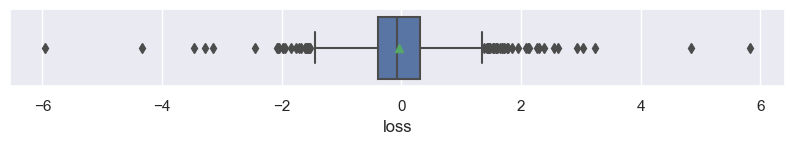

In [29]:
fig, ax = plt.subplots(figsize=(10,1))
sns.boxplot(data=losses, x='loss', showmeans=True);

In [30]:
returns.head()

,name,return
Date,,
2019-01-03,SP500,-0.025189
2019-01-03,Commo,0.008431
2019-01-03,TBond,0.012990
2019-01-04,SP500,0.034113
2019-01-04,Commo,-0.007045


Same but comparing three assets (use the long-form table).

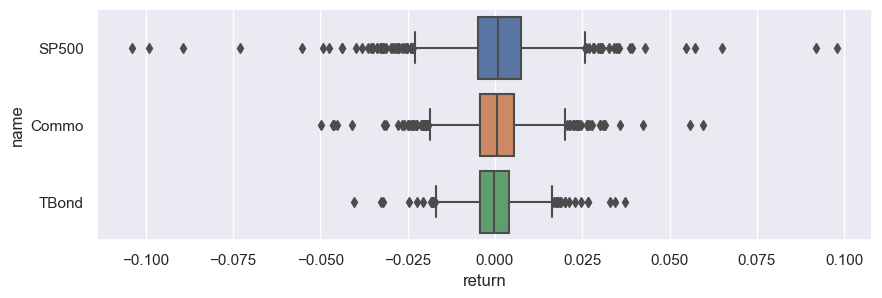

In [32]:
fig, ax = plt.subplots(figsize=(10, 3))
sns.boxplot(data=returns, x='return', y='name');

# Historical VaR

In [33]:
losses.head()

,loss
Date,
2019-01-03,0.701146
2019-01-04,-1.205288
2019-01-07,-0.367580
2019-01-08,-0.279344
2019-01-09,-0.193142


In [34]:
losses_order = losses.sort_values(by='loss')
display(losses_order.head())
display(losses_order.tail())

,loss
Date,
2020-03-24,-5.951403
2022-11-10,-4.326533
2020-04-06,-3.458908
2020-03-13,-3.285926
2020-03-26,-3.139109


,loss
Date,
2020-03-23,2.945105
2022-06-13,3.041510
2020-03-18,3.237599
2020-03-16,4.838571
2020-03-12,5.826666


In [35]:
losses_order.shape

(1258, 1)

In [36]:
1258 * .95

1195.1

In [37]:
losses_order.iloc[1195-1]

loss    1.061534
Name: 2022-03-14 00:00:00, dtype: float64

In [39]:
losses_order.iloc[1194:].mean()

loss    1.69706
dtype: float64

In [40]:
def historical_VaR(loss_history, confidence):
    losses_order = loss_history.sort_values(by='loss')
    n_losses = losses_order.shape[0]
    quantile_pos = int(np.floor(n_losses*confidence))
    hist_VaR = losses_order.iloc[quantile_pos-1,0]
    hist_ES = losses_order.iloc[quantile_pos-1:,0].mean()
    print(f"VaR is at position {quantile_pos} on a total of {n_losses}")
    print(f"Historical VaR at the {confidence:.1%} confidence level is {hist_VaR:.3f} million EUR.")
    print(f"Historical ES at the {confidence:.1%} confidence level is {hist_ES:.3f} million EUR.")
    return hist_VaR, hist_ES


In [42]:
historical_VaR(losses, .99)

VaR is at position 1245 on a total of 1258
Historical VaR at the 99.0% confidence level is 1.957 million EUR.
Historical ES at the 99.0% confidence level is 2.881 million EUR.


(1.957109170930529, 2.880514054723888)